In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# DATA SET 3

In [2]:
a=pd.read_csv(r"C:\Users\user\Downloads\C10_air\csvs_per_year\csvs_per_year\madrid_2003.csv")
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,2003-03-01 01:00:00,NaN,1.72,NaN,NaN,NaN,73.900002,316.299988,NaN,10.550000,55.209999,NaN,24.299999,NaN,NaN,28079001
1,2003-03-01 01:00:00,NaN,1.45,NaN,NaN,0.26,72.110001,250.000000,0.73,6.720000,52.389999,NaN,14.230000,1.55,NaN,28079035
2,2003-03-01 01:00:00,NaN,1.57,NaN,NaN,NaN,80.559998,224.199997,NaN,21.049999,63.240002,NaN,17.879999,NaN,NaN,28079003
3,2003-03-01 01:00:00,NaN,2.45,NaN,NaN,NaN,78.370003,450.399994,NaN,4.220000,67.839996,NaN,24.900000,NaN,NaN,28079004
4,2003-03-01 01:00:00,NaN,3.26,NaN,NaN,NaN,96.250000,479.100006,NaN,8.460000,95.779999,NaN,18.750000,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243979,2003-10-01 00:00:00,0.20,0.16,2.01,3.17,0.02,31.799999,32.299999,1.68,34.049999,7.380000,1.20,4.870000,1.27,1.00,28079024
243980,2003-10-01 00:00:00,0.32,0.08,0.36,0.72,NaN,10.450000,14.760000,1.00,34.610001,7.400000,0.50,8.360000,NaN,0.88,28079025
243981,2003-10-01 00:00:00,NaN,NaN,NaN,NaN,0.07,34.639999,50.810001,NaN,32.160000,16.830000,NaN,5.330000,1.55,NaN,28079026
243982,2003-10-01 00:00:00,NaN,NaN,NaN,NaN,0.07,32.580002,41.020000,NaN,NaN,13.570000,NaN,6.830000,1.27,NaN,28079027


In [3]:
b=a.fillna(value=10)
b

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,2003-03-01 01:00:00,10.00,1.72,10.00,10.00,10.00,73.900002,316.299988,10.00,10.550000,55.209999,10.00,24.299999,10.00,10.00,28079001
1,2003-03-01 01:00:00,10.00,1.45,10.00,10.00,0.26,72.110001,250.000000,0.73,6.720000,52.389999,10.00,14.230000,1.55,10.00,28079035
2,2003-03-01 01:00:00,10.00,1.57,10.00,10.00,10.00,80.559998,224.199997,10.00,21.049999,63.240002,10.00,17.879999,10.00,10.00,28079003
3,2003-03-01 01:00:00,10.00,2.45,10.00,10.00,10.00,78.370003,450.399994,10.00,4.220000,67.839996,10.00,24.900000,10.00,10.00,28079004
4,2003-03-01 01:00:00,10.00,3.26,10.00,10.00,10.00,96.250000,479.100006,10.00,8.460000,95.779999,10.00,18.750000,10.00,10.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243979,2003-10-01 00:00:00,0.20,0.16,2.01,3.17,0.02,31.799999,32.299999,1.68,34.049999,7.380000,1.20,4.870000,1.27,1.00,28079024
243980,2003-10-01 00:00:00,0.32,0.08,0.36,0.72,10.00,10.450000,14.760000,1.00,34.610001,7.400000,0.50,8.360000,10.00,0.88,28079025
243981,2003-10-01 00:00:00,10.00,10.00,10.00,10.00,0.07,34.639999,50.810001,10.00,32.160000,16.830000,10.00,5.330000,1.55,10.00,28079026
243982,2003-10-01 00:00:00,10.00,10.00,10.00,10.00,0.07,32.580002,41.020000,10.00,10.000000,13.570000,10.00,6.830000,1.27,10.00,28079027


In [4]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243984 entries, 0 to 243983
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     243984 non-null  object 
 1   BEN      243984 non-null  float64
 2   CO       243984 non-null  float64
 3   EBE      243984 non-null  float64
 4   MXY      243984 non-null  float64
 5   NMHC     243984 non-null  float64
 6   NO_2     243984 non-null  float64
 7   NOx      243984 non-null  float64
 8   OXY      243984 non-null  float64
 9   O_3      243984 non-null  float64
 10  PM10     243984 non-null  float64
 11  PXY      243984 non-null  float64
 12  SO_2     243984 non-null  float64
 13  TCH      243984 non-null  float64
 14  TOL      243984 non-null  float64
 15  station  243984 non-null  int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 29.8+ MB


In [5]:
b.describe()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
count,243984.000000,243984.000000,243984.000000,243984.000000,243984.000000,243984.000000,243984.000000,243984.000000,243984.000000,243984.000000,243984.000000,243984.000000,243984.000000,243984.000000,2.439840e+05
mean,7.743520,1.412711,8.104450,9.199157,5.481896,58.113787,114.350607,8.714701,35.818326,35.207445,8.658546,12.341070,6.071496,9.885529,2.807902e+07
std,3.787975,2.538883,3.615828,3.031816,4.907632,31.683258,105.217804,3.106504,30.269798,28.919041,3.098546,9.038647,4.268360,5.315371,1.854340e+01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.460000,0.000000,0.190000,0.860000,0.000000,2.807900e+07
25%,4.057500,0.360000,10.000000,10.000000,0.120000,34.360001,45.570000,10.000000,10.000000,14.280000,10.000000,7.020000,1.400000,10.000000,2.807901e+07
50%,10.000000,0.580000,10.000000,10.000000,10.000000,54.560001,84.110001,10.000000,27.459999,27.639999,10.000000,9.860000,10.000000,10.000000,2.807902e+07
75%,10.000000,1.000000,10.000000,10.000000,10.000000,76.870003,147.899994,10.000000,53.660000,47.279999,10.000000,14.430000,10.000000,10.000000,2.807903e+07
max,66.389999,12.860000,162.199997,177.600006,10.000000,386.500000,1444.000000,88.180000,215.399994,286.200012,106.000000,172.100006,10.000000,169.300003,2.807910e+07


In [6]:
c=b.head(100)
c

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,2003-03-01 01:00:00,10.00,1.72,10.00,10.0,10.00,73.900002,316.299988,10.00,10.550000,55.209999,10.0,24.299999,10.00,10.00,28079001
1,2003-03-01 01:00:00,10.00,1.45,10.00,10.0,0.26,72.110001,250.000000,0.73,6.720000,52.389999,10.0,14.230000,1.55,10.00,28079035
2,2003-03-01 01:00:00,10.00,1.57,10.00,10.0,10.00,80.559998,224.199997,10.00,21.049999,63.240002,10.0,17.879999,10.00,10.00,28079003
3,2003-03-01 01:00:00,10.00,2.45,10.00,10.0,10.00,78.370003,450.399994,10.00,4.220000,67.839996,10.0,24.900000,10.00,10.00,28079004
4,2003-03-01 01:00:00,10.00,3.26,10.00,10.0,10.00,96.250000,479.100006,10.00,8.460000,95.779999,10.0,18.750000,10.00,10.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2003-03-01 04:00:00,10.00,1.58,10.00,10.0,10.00,75.080002,215.699997,10.00,8.470000,41.430000,10.0,26.520000,10.00,10.00,28079012
96,2003-03-01 04:00:00,10.00,1.04,10.00,10.0,0.26,61.529999,120.500000,10.00,7.300000,37.720001,10.0,6.560000,1.53,10.00,28079040
97,2003-03-01 04:00:00,10.00,1.73,10.00,10.0,10.00,36.889999,136.500000,10.00,6.780000,28.980000,10.0,9.810000,10.00,10.00,28079014
98,2003-03-01 04:00:00,3.94,0.76,6.01,10.0,0.27,69.720001,131.800003,10.00,1.480000,22.389999,10.0,14.540000,1.56,19.74,28079015


In [7]:
c.columns

Index(['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [8]:
d=c[['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']]
d

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station
0,10.00,1.72,10.00,10.0,10.00,73.900002,316.299988,10.00,10.550000,55.209999,10.0,24.299999,10.00,10.00,28079001
1,10.00,1.45,10.00,10.0,0.26,72.110001,250.000000,0.73,6.720000,52.389999,10.0,14.230000,1.55,10.00,28079035
2,10.00,1.57,10.00,10.0,10.00,80.559998,224.199997,10.00,21.049999,63.240002,10.0,17.879999,10.00,10.00,28079003
3,10.00,2.45,10.00,10.0,10.00,78.370003,450.399994,10.00,4.220000,67.839996,10.0,24.900000,10.00,10.00,28079004
4,10.00,3.26,10.00,10.0,10.00,96.250000,479.100006,10.00,8.460000,95.779999,10.0,18.750000,10.00,10.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.00,1.58,10.00,10.0,10.00,75.080002,215.699997,10.00,8.470000,41.430000,10.0,26.520000,10.00,10.00,28079012
96,10.00,1.04,10.00,10.0,0.26,61.529999,120.500000,10.00,7.300000,37.720001,10.0,6.560000,1.53,10.00,28079040
97,10.00,1.73,10.00,10.0,10.00,36.889999,136.500000,10.00,6.780000,28.980000,10.0,9.810000,10.00,10.00,28079014
98,3.94,0.76,6.01,10.0,0.27,69.720001,131.800003,10.00,1.480000,22.389999,10.0,14.540000,1.56,19.74,28079015


# LINEAR REGRESSION

In [9]:
x=d[['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL']]
y=d['station']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [11]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
print(lr.intercept_)


28078995.148774628


In [13]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,7.631730
CO,0.038486
EBE,-7.578563
MXY,0.868560
NMHC,-15.987912
NO_2,0.182921
NOx,-0.092406
OXY,-2.094068
O_3,-1.091080
PM10,0.358251


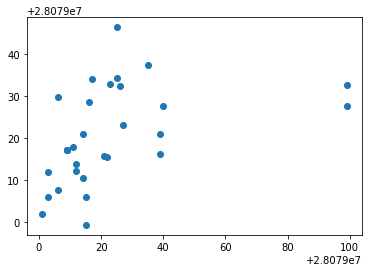

In [14]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [15]:
print(lr.score(x_test,y_test))

0.1735235024711309


In [16]:
lr.score(x_train,y_train)

0.45508516852087766

# LASSO REGRESSION

In [17]:
from sklearn.linear_model import Ridge,Lasso

In [18]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [19]:
la.score(x_test,y_test)

0.043108441463400204

# RIDGE REGRESSION

In [20]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [21]:
rr.score(x_test,y_test)

0.19634918426550385

# LOGISTIC REGRESSION

In [22]:
w=d.iloc[:,0:14]
w1=d.iloc[:,-1]

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
b=StandardScaler().fit_transform(w)


In [25]:
from sklearn.model_selection import train_test_split
b_train,b_test,w1_train,w1_test=train_test_split(b,w1,test_size=0.7)

In [26]:
p=LogisticRegression(max_iter=10000)
p.fit(b,w1)

LogisticRegression(max_iter=10000)

In [27]:
t=[[12,22,32,42,52,45,32,56,87,34,69,15,23,90]]


In [28]:
e=p.predict(t)
print(e)

[28079022]


In [29]:
p.classes_

array([28079001, 28079003, 28079004, 28079006, 28079007, 28079008,
       28079009, 28079011, 28079012, 28079014, 28079015, 28079016,
       28079017, 28079018, 28079019, 28079021, 28079022, 28079023,
       28079024, 28079025, 28079026, 28079027, 28079035, 28079036,
       28079038, 28079039, 28079040, 28079099], dtype=int64)

In [30]:
print(p.score(x_test,y_test))

0.0


In [31]:
p.predict_proba(t)[0][0]

6.709961028453436e-29

In [32]:
p.predict_proba(t)[0][1]

5.7508760312698735e-08

# ELASTIC NET

In [33]:
from sklearn.linear_model import ElasticNet 
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [34]:
print(p.coef_)

[ 0.94654288  0.13928797 -0.27362901 -0.12568961  0.17735871  0.17875251
 -0.08094026 -1.85593667 -0.9308093   0.37919982 -0.02362874 -0.67865708
  0.17998228  0.3748196 ]


In [35]:
print(p.intercept_)

28079031.620318007


In [36]:
print(p.predict(x_test))

[28079015.68684914 28079017.78879578 28079027.68459067 28079011.62882042
 28079026.36206447 28079020.21933375 28079037.11495504 28079015.68684914
 28079023.44526891 28079015.90238826 28079033.8472394  28079015.1887445
 28079034.75112583 28079024.38796201 28079013.72660009 28079014.3433651
 28079029.09641979 28079014.71532959 28079021.39319232 28079015.68684914
 28079028.93093387 28079028.96850615 28079024.29127646 28079029.03245381
 28079003.12112099 28079015.29816401 28079007.5783569  28079026.81740701
 28079046.8300688  28079012.80190236]


In [37]:
print(p.score(x_test,y_test))

0.17459868792031452


# RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
parameters={'max_depth':[1,53,67,53,57],
  'min_samples_leaf':[5,34,67,87,45],
           'n_estimators':[23,45,67,23,56]}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 53, 67, 53, 57],
                         'min_samples_leaf': [5, 34, 67, 87, 45],
                         'n_estimators': [23, 45, 67, 23, 56]},
             scoring='accuracy')

In [41]:
grid_search.best_score_

0.41428571428571426

In [42]:
rfc_best=grid_search.best_estimator_

[Text(1395.0, 2397.276, 'X[4] <= 5.295\ngini = 0.948\nsamples = 47\nvalue = [9, 3, 3, 1, 4, 3, 1, 2, 2, 1, 3, 2, 1, 2\n2, 3, 1, 2, 4, 1, 4, 1, 4, 4, 3, 0, 2, 2]'),
 Text(558.0, 1864.548, 'X[7] <= 3.55\ngini = 0.91\nsamples = 22\nvalue = [0, 0, 0, 1, 4, 3, 0, 2, 0, 0, 3, 0, 0, 2\n0, 0, 0, 2, 4, 0, 4, 1, 4, 0, 0, 0, 2, 2]'),
 Text(279.0, 1331.82, 'gini = 0.5\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0]'),
 Text(837.0, 1331.82, 'X[11] <= 18.815\ngini = 0.893\nsamples = 17\nvalue = [0, 0, 0, 1, 4, 3, 0, 2, 0, 0, 3, 0, 0, 2\n0, 0, 0, 2, 0, 0, 4, 1, 0, 0, 0, 0, 2, 2]'),
 Text(558.0, 799.0920000000001, 'X[11] <= 12.6\ngini = 0.836\nsamples = 11\nvalue = [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2\n0, 0, 0, 2, 0, 0, 4, 1, 0, 0, 0, 0, 2, 2]'),
 Text(279.0, 266.36400000000003, 'gini = 0.691\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 2, 0, 0, 4, 1, 0, 0, 0, 0, 2, 0]'),
 Text(837.0, 266.36400000000003, 'gini

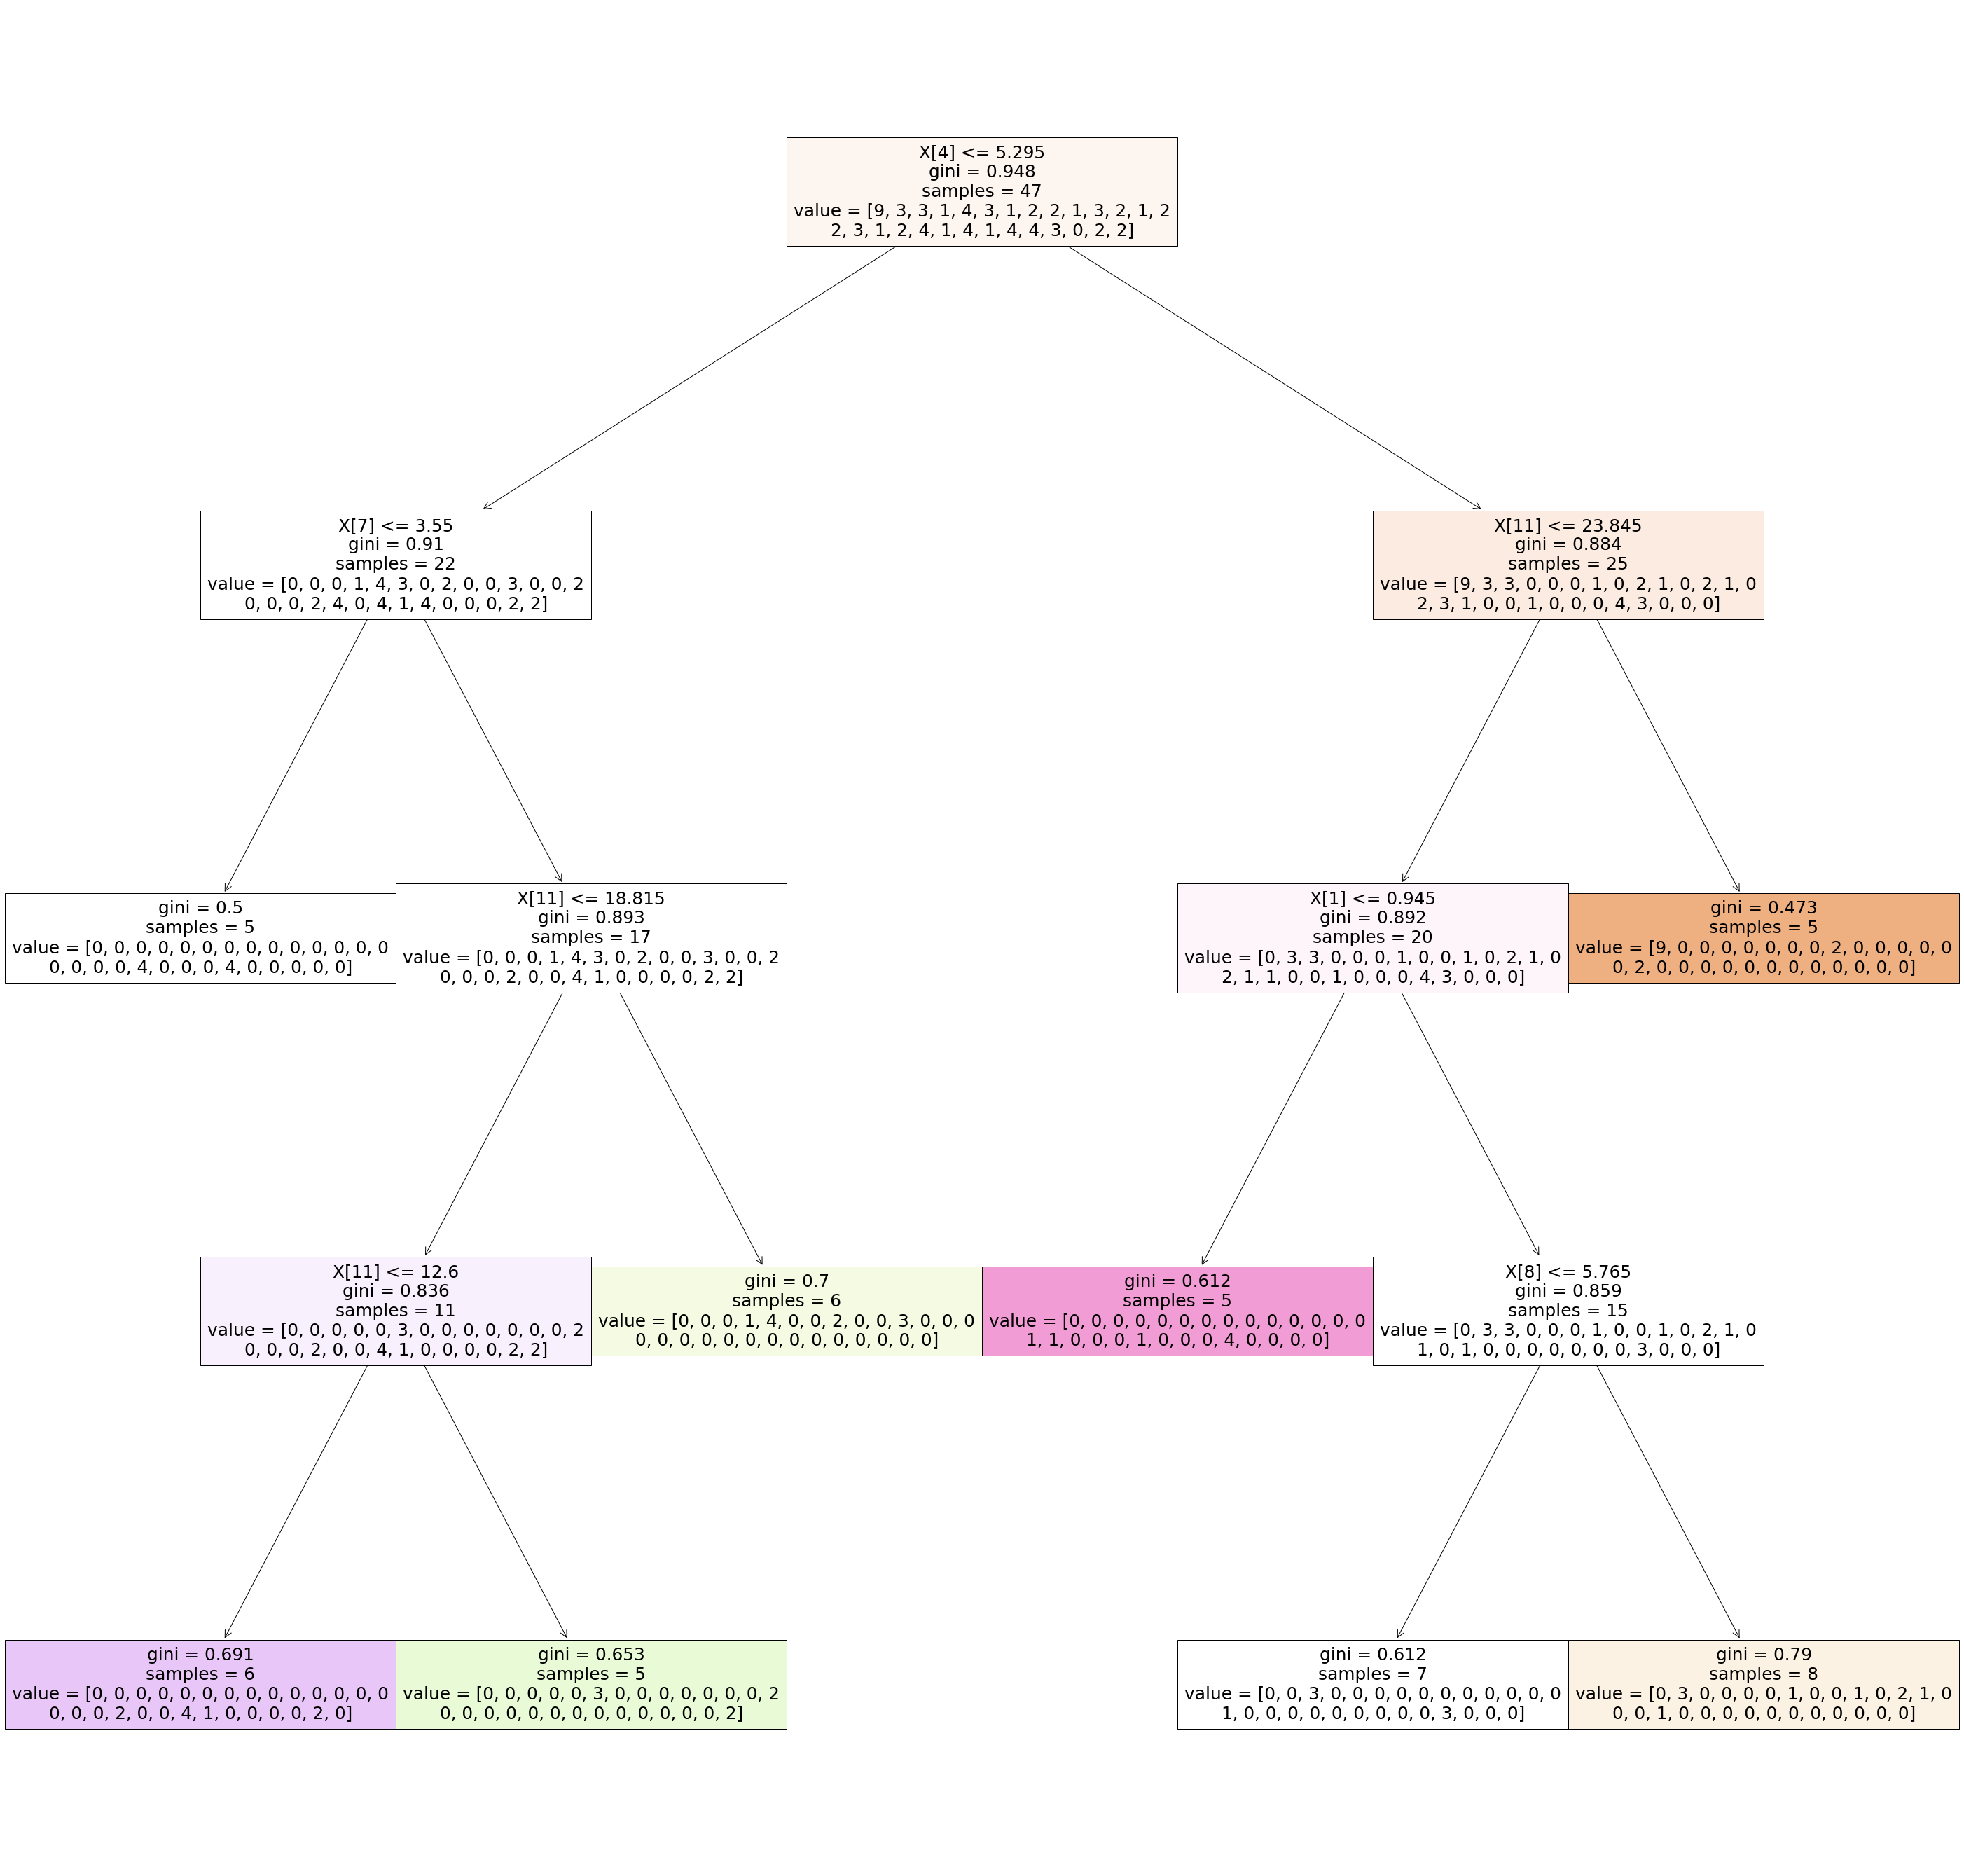

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)

# Conclusion:Random Forest score=0.41428571428571426 is a Highest accuracy

# DATA SET 4

In [44]:
s=pd.read_csv(r"C:\Users\user\Downloads\C10_air\csvs_per_year\csvs_per_year\madrid_2004.csv")
s

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2004-08-01 01:00:00,NaN,0.66,NaN,NaN,NaN,89.550003,118.900002,NaN,40.020000,39.990002,25.860001,NaN,12.20,NaN,NaN,28079001
1,2004-08-01 01:00:00,2.66,0.54,2.99,6.08,0.18,51.799999,53.860001,3.28,51.689999,22.950001,NaN,3.38,6.12,1.57,11.37,28079035
2,2004-08-01 01:00:00,NaN,1.02,NaN,NaN,NaN,93.389999,138.600006,NaN,20.860001,49.480000,NaN,NaN,8.99,NaN,NaN,28079003
3,2004-08-01 01:00:00,NaN,0.53,NaN,NaN,NaN,87.290001,105.000000,NaN,36.730000,31.070000,NaN,NaN,8.82,NaN,NaN,28079004
4,2004-08-01 01:00:00,NaN,0.17,NaN,NaN,NaN,34.910000,35.349998,NaN,86.269997,54.080002,NaN,NaN,8.71,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245491,2004-06-01 00:00:00,0.75,0.21,0.85,1.55,0.07,59.580002,64.389999,0.66,33.029999,30.900000,14.860000,0.52,6.62,1.28,2.55,28079024
245492,2004-06-01 00:00:00,2.49,0.75,2.44,4.57,NaN,97.139999,146.899994,2.34,7.740000,37.689999,NaN,2.35,6.92,NaN,11.93,28079025
245493,2004-06-01 00:00:00,NaN,NaN,NaN,NaN,0.13,102.699997,132.600006,NaN,17.809999,22.840000,12.040000,NaN,7.82,1.52,NaN,28079026
245494,2004-06-01 00:00:00,NaN,NaN,NaN,NaN,0.09,82.599998,102.599998,NaN,NaN,45.630001,NaN,NaN,5.53,1.33,NaN,28079027


In [45]:
s1=s.fillna(value=4)
s1

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2004-08-01 01:00:00,4.00,0.66,4.00,4.00,4.00,89.550003,118.900002,4.00,40.020000,39.990002,25.860001,4.00,12.20,4.00,4.00,28079001
1,2004-08-01 01:00:00,2.66,0.54,2.99,6.08,0.18,51.799999,53.860001,3.28,51.689999,22.950001,4.000000,3.38,6.12,1.57,11.37,28079035
2,2004-08-01 01:00:00,4.00,1.02,4.00,4.00,4.00,93.389999,138.600006,4.00,20.860001,49.480000,4.000000,4.00,8.99,4.00,4.00,28079003
3,2004-08-01 01:00:00,4.00,0.53,4.00,4.00,4.00,87.290001,105.000000,4.00,36.730000,31.070000,4.000000,4.00,8.82,4.00,4.00,28079004
4,2004-08-01 01:00:00,4.00,0.17,4.00,4.00,4.00,34.910000,35.349998,4.00,86.269997,54.080002,4.000000,4.00,8.71,4.00,4.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245491,2004-06-01 00:00:00,0.75,0.21,0.85,1.55,0.07,59.580002,64.389999,0.66,33.029999,30.900000,14.860000,0.52,6.62,1.28,2.55,28079024
245492,2004-06-01 00:00:00,2.49,0.75,2.44,4.57,4.00,97.139999,146.899994,2.34,7.740000,37.689999,4.000000,2.35,6.92,4.00,11.93,28079025
245493,2004-06-01 00:00:00,4.00,4.00,4.00,4.00,0.13,102.699997,132.600006,4.00,17.809999,22.840000,12.040000,4.00,7.82,1.52,4.00,28079026
245494,2004-06-01 00:00:00,4.00,4.00,4.00,4.00,0.09,82.599998,102.599998,4.00,4.000000,45.630001,4.000000,4.00,5.53,1.33,4.00,28079027


In [46]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245496 entries, 0 to 245495
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     245496 non-null  object 
 1   BEN      245496 non-null  float64
 2   CO       245496 non-null  float64
 3   EBE      245496 non-null  float64
 4   MXY      245496 non-null  float64
 5   NMHC     245496 non-null  float64
 6   NO_2     245496 non-null  float64
 7   NOx      245496 non-null  float64
 8   OXY      245496 non-null  float64
 9   O_3      245496 non-null  float64
 10  PM10     245496 non-null  float64
 11  PM25     245496 non-null  float64
 12  PXY      245496 non-null  float64
 13  SO_2     245496 non-null  float64
 14  TCH      245496 non-null  float64
 15  TOL      245496 non-null  float64
 16  station  245496 non-null  int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 31.8+ MB


In [47]:
s2=s1.head(100)
s2

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2004-08-01 01:00:00,4.00,0.66,4.00,4.00,4.00,89.550003,118.900002,4.00,40.020000,39.990002,25.860001,4.00,12.20,4.00,4.00,28079001
1,2004-08-01 01:00:00,2.66,0.54,2.99,6.08,0.18,51.799999,53.860001,3.28,51.689999,22.950001,4.000000,3.38,6.12,1.57,11.37,28079035
2,2004-08-01 01:00:00,4.00,1.02,4.00,4.00,4.00,93.389999,138.600006,4.00,20.860001,49.480000,4.000000,4.00,8.99,4.00,4.00,28079003
3,2004-08-01 01:00:00,4.00,0.53,4.00,4.00,4.00,87.290001,105.000000,4.00,36.730000,31.070000,4.000000,4.00,8.82,4.00,4.00,28079004
4,2004-08-01 01:00:00,4.00,0.17,4.00,4.00,4.00,34.910000,35.349998,4.00,86.269997,54.080002,4.000000,4.00,8.71,4.00,4.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2004-08-01 04:00:00,4.00,0.00,4.00,4.00,4.00,26.850000,27.930000,4.00,86.650002,29.629999,4.000000,4.00,8.76,4.00,4.00,28079016
96,2004-08-01 04:00:00,4.00,0.26,4.00,4.00,4.00,16.959999,18.200001,4.00,86.309998,49.590000,4.000000,4.00,5.65,4.00,4.00,28079017
97,2004-08-01 04:00:00,4.00,0.01,4.00,4.00,0.31,24.870001,26.040001,4.00,79.279999,4.000000,4.000000,4.00,3.99,1.68,4.00,28079018
98,2004-08-01 04:00:00,4.00,0.34,4.00,4.00,4.00,39.549999,45.000000,4.00,67.430000,45.799999,4.000000,4.00,5.51,4.00,4.00,28079019


In [48]:
#linear
x=s2.iloc[:,1:10]
y=s2.iloc[:,-1]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [50]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
print(lr.intercept_)

28079032.18431932


In [52]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-1.209120
CO,2.982818
EBE,1.729094
MXY,15.424495
NMHC,-0.240666
NO_2,0.496552
NOx,-0.493504
OXY,-20.726451
O_3,0.116923


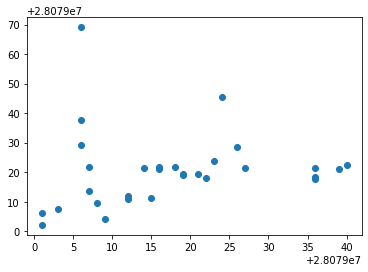

In [53]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [54]:
print(lr.score(x_test,y_test))

-1.0608243364488361


In [55]:
lr.score(x_train,y_train)

0.4694075194605054

In [95]:
#lasso
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [96]:
la.score(x_test,y_test)

0.3141586680020704

In [97]:
#ridge
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [59]:
rr.score(x_test,y_test)

-0.06298437744753627

In [98]:
#logistic
b=StandardScaler().fit_transform(x)


In [61]:
p=LogisticRegression(max_iter=10000)
p.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [62]:
t=[[12,22,32,42,52,45,32,56,87]]

In [63]:
e=p.predict(t)
print(e)

[28079019]


In [64]:
p.classes_

array([28079001, 28079003, 28079004, 28079006, 28079007, 28079008,
       28079009, 28079011, 28079012, 28079014, 28079015, 28079016,
       28079017, 28079018, 28079019, 28079021, 28079022, 28079023,
       28079024, 28079025, 28079026, 28079027, 28079035, 28079036,
       28079039, 28079040, 28079099], dtype=int64)

In [65]:
print(p.score(x_test,y_test))

0.8


In [66]:
p.predict_proba(t)[0][0]

5.506793526864368e-31

In [67]:
p.predict_proba(t)[0][1]

3.298753801439058e-37

In [99]:
#elastic
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [100]:
print(p.coef_)

[-1.84070438e+00  6.29284427e-02 -3.07253206e-01  1.69356295e+00
 -1.31799614e+00  1.12525258e-01 -2.31407854e-01 -4.61274372e+00
  3.49468065e-03]


In [101]:
print(p.intercept_)

28079050.022521302


In [102]:
print(p.predict(x_test))

[28079018.0238006  28079010.24465495 28079017.9811607  28079013.60900374
 28079023.44925    28079021.98315485 28079026.39571916 28079024.31070657
 28079020.05986123 28079024.49389285 28079012.54012301 28079020.9043071
 28079003.44383387 28079021.10058437 28079008.24606954 28079018.23117746
 28079026.94370631 28079025.00298546 28079021.34287917 28079019.02833014
 28079017.35154641 28079016.45511237 28079024.12720002 28079023.02050294
 28079044.20930376 28079005.99713394 28079022.16506625 28079010.98320913
 28079013.81292441 28079022.90497846]


In [72]:
print(p.score(x_test,y_test))

0.13948201780418934


In [103]:
#randomforest
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [104]:
parameters={'max_depth':[1,53,75,3,57],
  'min_samples_leaf':[5,34,67,87,45],
           'n_estimators':[3,53,7,23,56]}

In [105]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 53, 75, 3, 57],
                         'min_samples_leaf': [5, 34, 67, 87, 45],
                         'n_estimators': [3, 53, 7, 23, 56]},
             scoring='accuracy')

In [106]:
grid_search.best_score_

0.3142857142857143

In [107]:
rfc_best=grid_search.best_estimator_

[Text(1395.0, 2219.7, 'X[2] <= 3.495\ngini = 0.947\nsamples = 44\nvalue = [2, 2, 4, 0, 0, 1, 4, 5, 3, 2, 4, 4, 2, 1\n0, 1, 2, 2, 0, 4, 4, 3, 7, 4, 3, 2, 4]'),
 Text(697.5, 1331.82, 'X[1] <= 0.43\ngini = 0.755\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0\n0, 0, 0, 0, 0, 4, 0, 0, 7, 0, 0, 0, 4]'),
 Text(348.75, 443.94000000000005, 'gini = 0.64\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0\n0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2]'),
 Text(1046.25, 443.94000000000005, 'gini = 0.46\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 2]'),
 Text(2092.5, 1331.82, 'X[1] <= 0.715\ngini = 0.935\nsamples = 34\nvalue = [2, 2, 4, 0, 0, 0, 4, 5, 3, 2, 0, 4, 2, 1\n0, 1, 2, 2, 0, 0, 4, 3, 0, 4, 3, 2, 0]'),
 Text(1743.75, 443.94000000000005, 'gini = 0.918\nsamples = 26\nvalue = [2, 1, 4, 0, 0, 0, 0, 5, 3, 2, 0, 4, 2, 1\n0, 1, 2, 2, 0, 0, 0, 0, 0, 4, 3, 2, 0]'),
 Text(2441.25, 443.94000000000005, 'gini = 0.708\nsamples

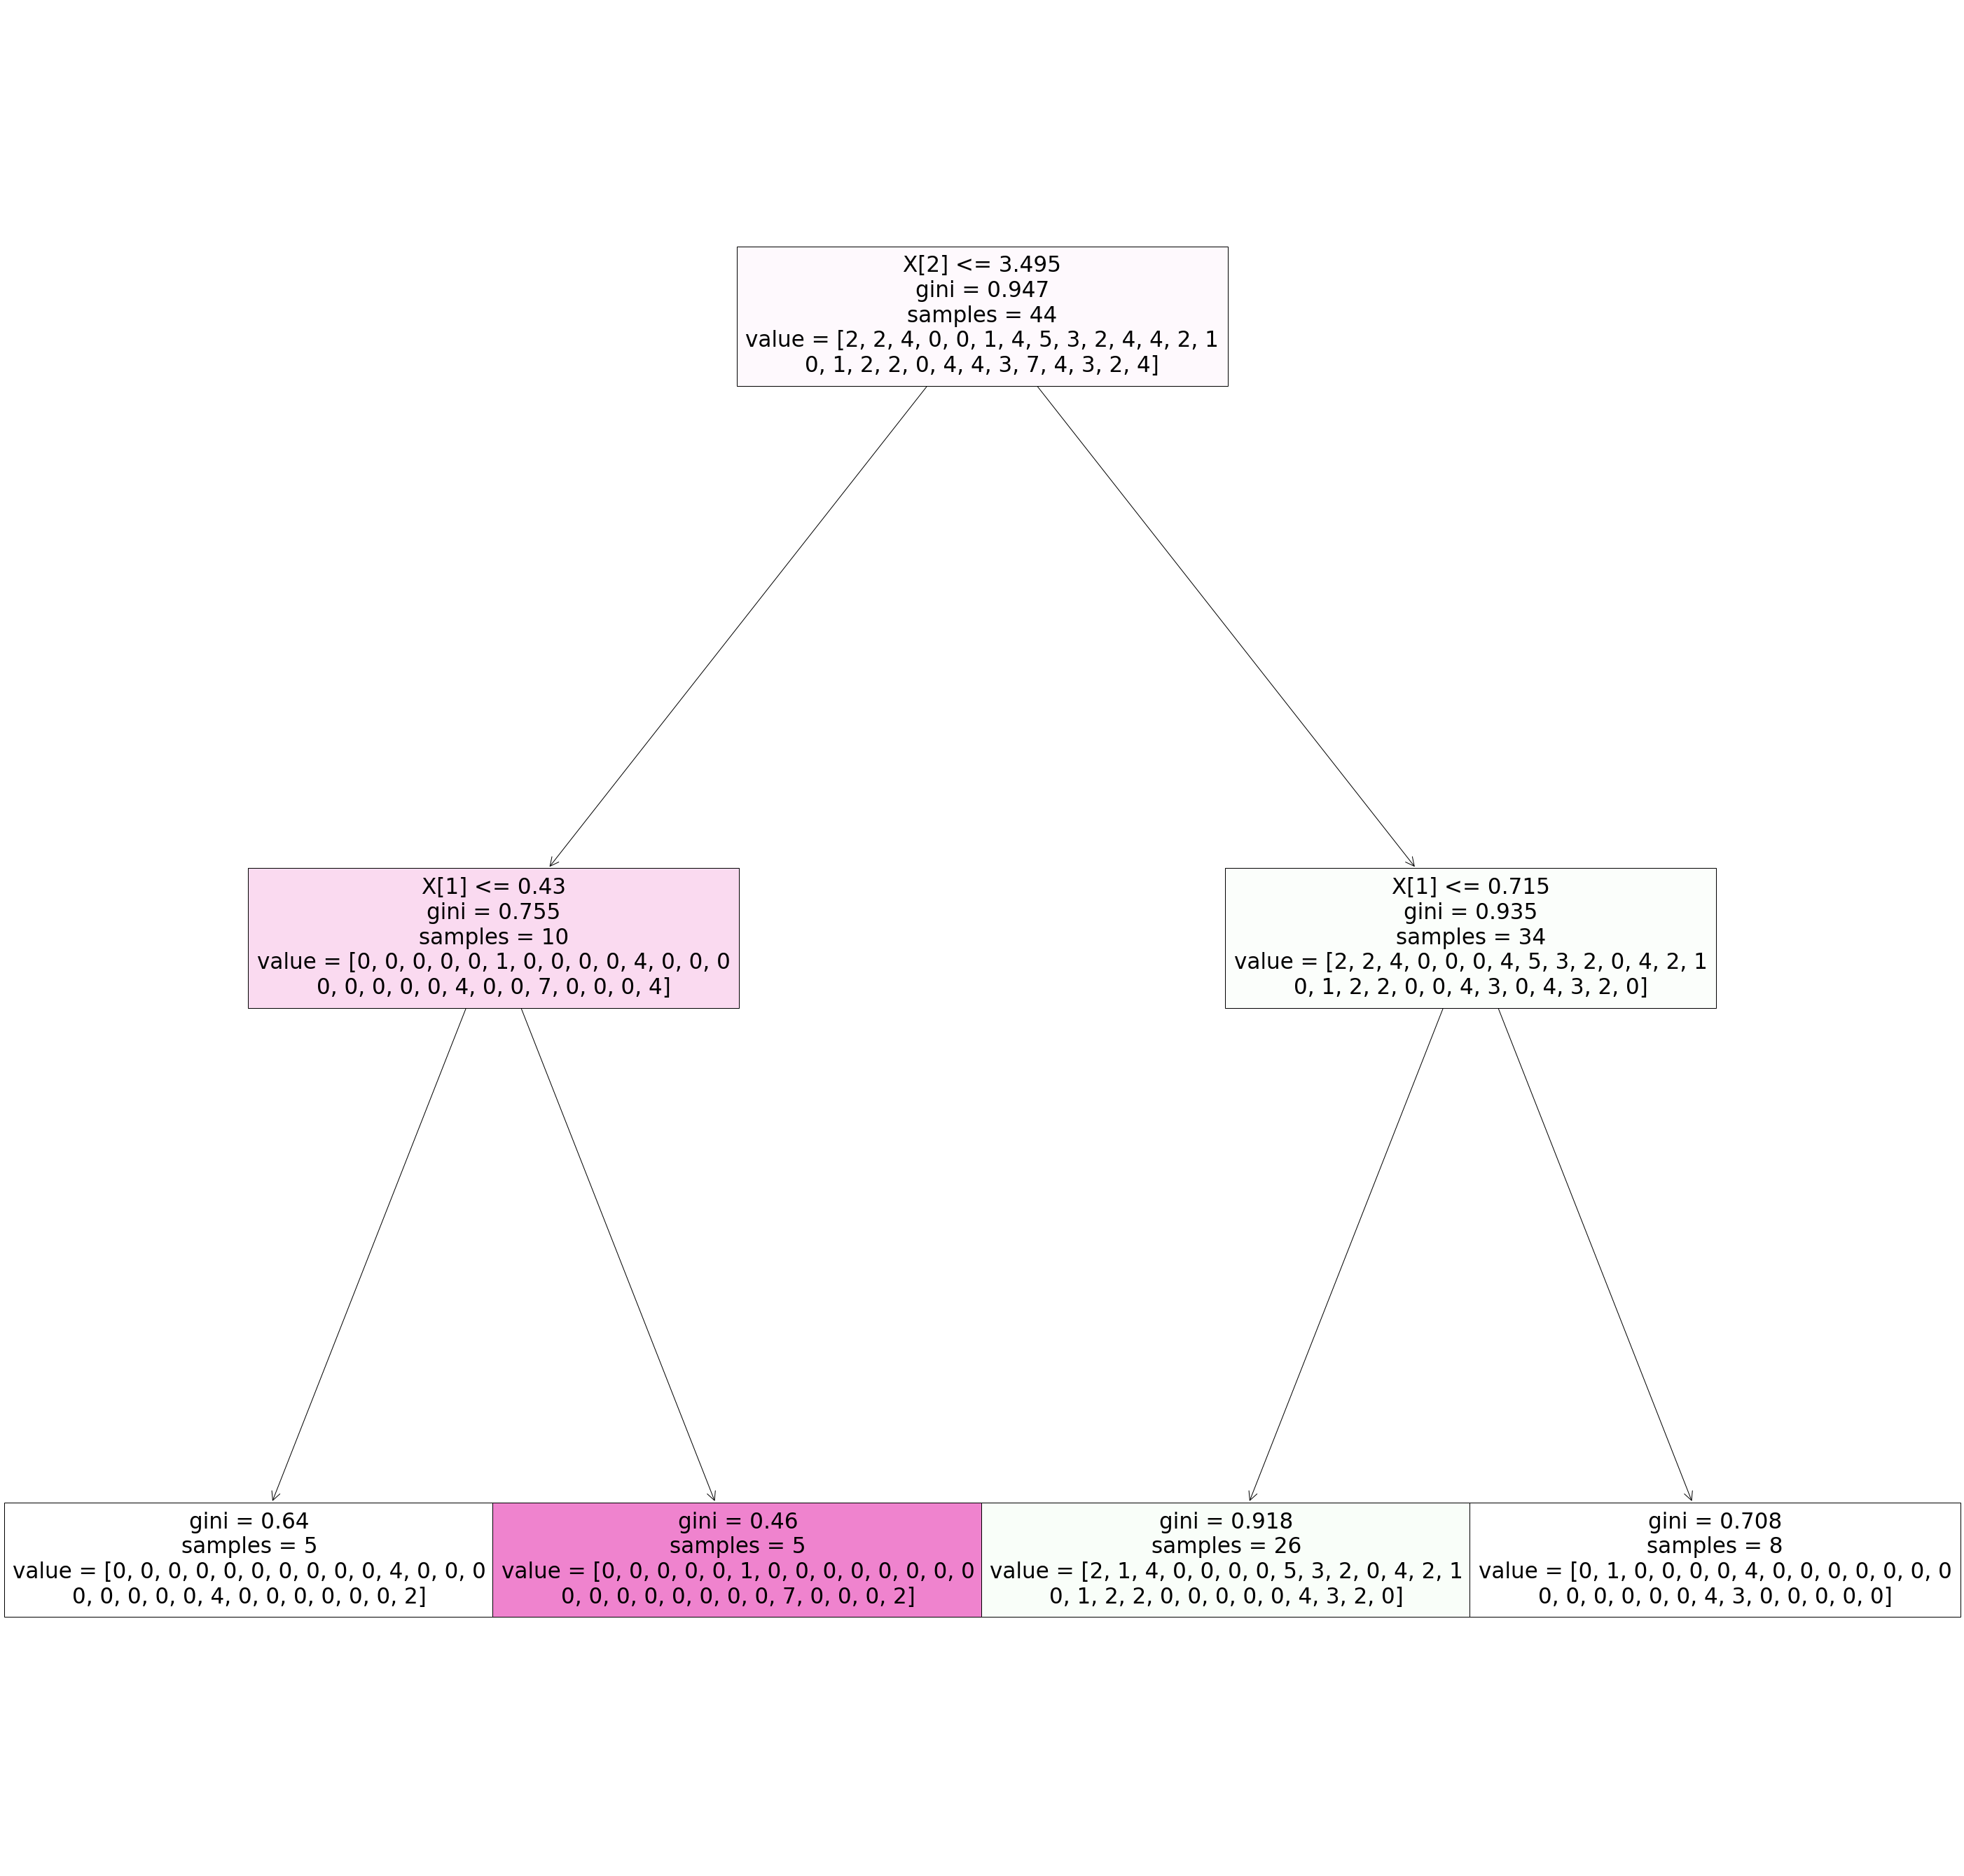

In [108]:
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)

# Conclusion:LOGISTIC SCORE=0.8 is a Highest accuracy